### COMPARING DBSCAN AND KMEANS

Here we will try to compare K-means and DBSCAN algorithms. We know that kmeans algorithm does not perform very well in clusters that are widely spread. We will try to explore this weakness and prove that DBSCAN performs better. 


In [1]:
'''generate data'''
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
N = 3000
filename = 'dbscan.csv'
with open(filename, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["x","y"])
    i = 0
    while(i<N):
        choice = np.random.uniform(0,1)
        
        if(choice>0.67):
            deviation = 1.5
            x = np.random.normal(0,deviation)
            y = np.random.normal(0,deviation)
        else:
            deviation = 5
            rmean = 10
            if(np.random.choice([-1,1])>0):
                x = np.random.uniform(-rmean,rmean)
                r = np.random.normal(rmean,deviation*0.1)
                choice = np.random.choice([-1,1])
                y = choice*(sqrt(abs(r**2 - x**2)))
            else:
                y = np.random.uniform(-rmean,rmean)
                r = np.random.normal(rmean,deviation*0.1)
                choice = np.random.choice([-1,1])
                x = choice* (sqrt(abs(r**2 - y**2)))
                
            
        writer.writerow([x,y])
        i+=1
            
'''Load Data'''
df = pd.read_csv(filename)
df.head()



,x,y
0,-6.569451,7.517511
1,5.063748,7.999175
2,-1.012818,0.393663
3,-6.076374,-7.839124
4,3.021664,0.390550


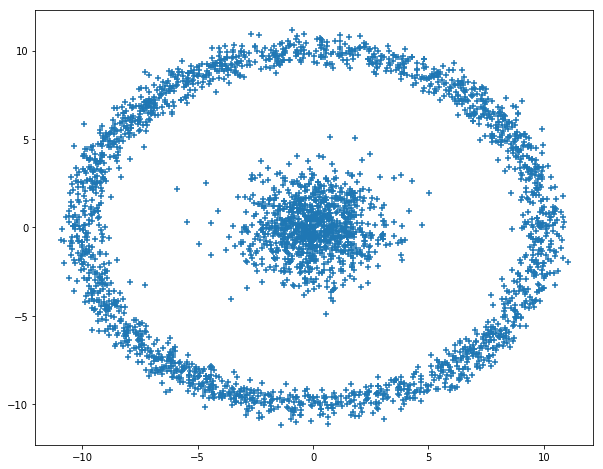

In [2]:
'''Visualize Data points'''
plt.figure(figsize =((10,8)))
plt.scatter(df.x,df.y,marker='+')
plt.show()

Text(0.5,1,'Elbow Method')

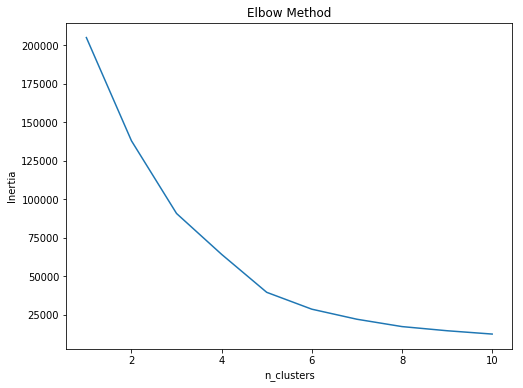

In [3]:
'''ELBOW METHOD'''

from sklearn.cluster import KMeans
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df.values)
    distortions.append(km.inertia_)

plt.figure(figsize =((8,6)))
plt.plot(list(range(1,11)),distortions)
plt.xlabel('n_clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

#### From the above graph we see that there is no clear elbow. The most promising is 5. So we continue K-Means with k-value= 5

In [4]:

km = KMeans(
        n_clusters=5, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [5]:
'''Prediction step'''
ypred = km.predict(df)

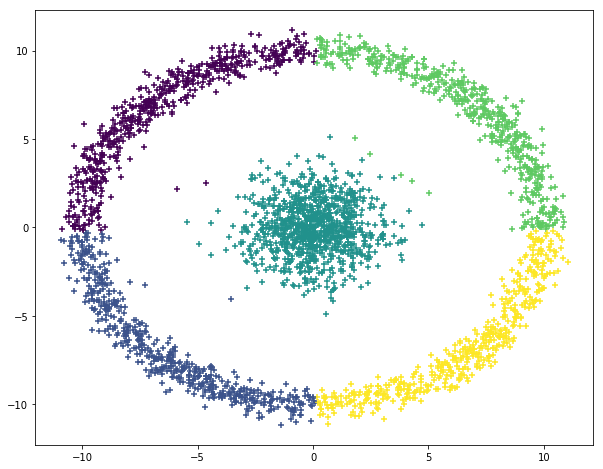

In [6]:
'''Visulaize results'''
plt.figure(figsize =((10,8)))
plt.scatter(df.x,df.y,marker='+',c=ypred)

In [7]:
from sklearn.cluster import DBSCAN
# db = DBSCAN(eps=0.5, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
db = DBSCAN()

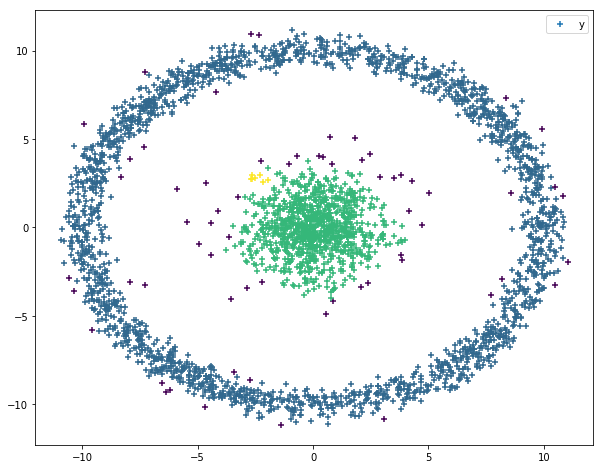

In [8]:
import matplotlib
ypred = db.fit_predict(df) + 1
plt.figure(figsize =((10,8)))
plt.scatter(df.x,df.y,marker='+',c=ypred)
plt.legend()

In [9]:
len(np.unique(db.labels_))

4

##### From the visulisation we can see that there are 2 main classes. One inner class and the other outer class which is concentric around the inner class. KMeans was not able to identify this concentric spread of the classes but DBSCAN was able to identify the main two classes and also some outliers